<a href="https://colab.research.google.com/github/lenchanti/TMD-framework/blob/main/unimodel_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import shutil
import re
import numpy as np
from scipy import interpolate
import pandas as pd
#import tensorflow_decision_forests as tfdf
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import tree
from glob import glob
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

path="/content/drive/MyDrive/merge"


# z-변환 함수 정의
def z_normalize(data):
    return (data - np.mean(data)) / np.std(data)


ori_df=pd.DataFrame()
mode=pd.DataFrame()
for sample_files in os.listdir(path):

    sample_file=pd.read_csv(path+"//"+sample_files)

    #X=sample_file.iloc[:,:-2]
    # y=sample_file[['Mode', 'Survay1']]
    sample_mode_file=sample_file[['Mode']]
    # sample_mode_file=pd.get_dummies(sample_mode_file,columns=["Mode"])
    col_names=sample_file.iloc[:,1:-2].columns

    sample_file=sample_file.iloc[:,:-2]

    # 각 센서 데이터에 대해 z-변환 적용
    sample_file = sample_file.apply(z_normalize)
    sample_file=sample_file.iloc[:,7:]
    sample_file=sample_file.drop("Height",axis=1)
    sample_file=sample_file.drop("Proxi",axis=1)
    sample_file=sample_file.drop("Light",axis=1)
    sample_file=sample_file.drop("Step",axis=1)

    col_names=sample_file.columns
    ori_df=pd.concat([ori_df,sample_file],axis=0,ignore_index=True)
    mode=pd.concat([mode,sample_mode_file],
                      axis=0,ignore_index=True)

df=pd.DataFrame()
ori_df = ori_df.apply(z_normalize)

lst=[15,30 ,60,120,180,240,300]

for i in lst:
  df_mode=pd.DataFrame()
  df_mode = mode.iloc[::i].reset_index(drop=True)
  #for j in range(i,mode.shape[0]+1,i):
   # df_mode=pd.concat([df_mode,mode[j-1:j]],ignore_index=True)


#z_normalization

  df=ori_df
  df_columns=df.columns

# 1. DataFrame을 NumPy 배열로 변환
  df = df.values

# 2. (22428000, 12) 배열을 (?, 120, 12) 배열로 변환
# 22428000이 120으로 나눠 떨어지기 때문에 재구성 가능

  df= np.reshape(df, (-1, i, 12))
# df= np.reshape(df, (-1, 30, 12))
# df= np.reshape(df, (-1, 60, 12))
# df= np.reshape(df, (-1, 120, 12))
# df= np.reshape(df, (-1, 180, 12))
# df= np.reshape(df, (-1, 240, 12))

# 결과 확인
  X=df
  y=df_mode
  y=pd.get_dummies(y,columns=["Mode"])


# 1. DataFrame을 NumPy 배열로 변환
  #y = y.values

# 2. (22428000, 12) 배열을 (?, 120, 12) 배열로 변환
# 22428000이 120으로 나눠 떨어지기 때문에 재구성 가능
  #y= np.reshape(y, (-1, 7))



  epochs=30
  learning_rates=0.001
  batch_size=128


    #데이터 분할
  X_train,X_test=train_test_split(X,test_size=0.3,random_state=42)
  y_train,y_test=train_test_split(y,test_size=0.3,random_state=42)



# 라벨을 one-hot 인코딩
#train_labels = to_categorical(y_train)
#test_labels = to_categorical(y_test)
#

# 2. DNN 모델 구축
  model = models.Sequential()

  model.add(LSTM(128, activation='tanh', recurrent_activation='sigmoid', return_sequences=True,input_shape=(i,12)))

# 두 번째 LSTM 레이어 (128 memory units, return_sequences=False)
# return_sequences=False로 마지막 time step에 대한 출력만 반환
  model.add(LSTM(128, activation='tanh', recurrent_activation='sigmoid', return_sequences=False))

# Fully connected layer (Output layer)
# 예시로 Dense layer를 추가 (클래스 개수에 맞게 output_dim 조정)
  model.add(Dense(7, activation='softmax'))
  model.add(layers.Dense(256, activation='relu'))  # 세 번째 히든 레이어
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(7, activation='softmax'))

# 3. 모델 컴파일
  model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. 모델 학습
  model.fit(X_train, y_train, epochs=30, batch_size=128)


# 5. 테스트 데이터로 성능 평가
  test_loss, test_acc = model.evaluate(X_test, y_test)
  print(f"{i/60}s의 Test accuracy: {test_acc}")






Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
8177/8177 ━━━━━━━━━━━━━━━━━━━━ 63s 7ms/step - accuracy: 0.6783 - loss: 0.8504
Epoch 2/30
8177/8177 ━━━━━━━━━━━━━━━━━━━━ 59s 7ms/step - accuracy: 0.9107 - loss: 0.2721
Epoch 3/30
8177/8177 ━━━━━━━━━━━━━━━━━━━━ 83s 7ms/step - accuracy: 0.9398 - loss: 0.1861
Epoch 4/30
8177/8177 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - accuracy: 0.9528 - loss: 0.1457
Epoch 5/30
8177/8177 ━━━━━━━━━━━━━━━━━━━━ 81s 7ms/step - accuracy: 0.9611 - loss: 0.1204
Epoch 6/30
8177/8177 ━━━━━━━━━━━━━━━━━━━━ 81s 7ms/step - accuracy: 0.9660 - loss: 0.1049
Epoch 7/30
8177/8177 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - accuracy: 0.9701 - loss: 0.0921
Epoch 8/30
8177/8177 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - accuracy: 0.9733 - loss: 0.0821
Epoch 9/30
8177/8177 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - accuracy: 0.9758 - loss: 0.0741
Epoch 10/30
8177/8177 ━━━━━━━━━━━━━━━━━━━━ 58s 7ms/step - accuracy: 0.9777 - loss: 0.0683
Epoch 11/30
8177/8177 ━━━━━━━━━━━━━━━━━━━━ 84s 7ms/step - accuracy: 0.9792 - loss: 0.0635
Epoch 12/30
8177/81

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
4089/4089 ━━━━━━━━━━━━━━━━━━━━ 35s 8ms/step - accuracy: 0.6276 - loss: 0.9889
Epoch 2/30
4089/4089 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.8575 - loss: 0.4141
Epoch 3/30
4089/4089 ━━━━━━━━━━━━━━━━━━━━ 34s 8ms/step - accuracy: 0.9065 - loss: 0.2786
Epoch 4/30
4089/4089 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.9288 - loss: 0.2163
Epoch 5/30
4089/4089 ━━━━━━━━━━━━━━━━━━━━ 33s 8ms/step - accuracy: 0.9421 - loss: 0.1760
Epoch 6/30
4089/4089 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.9501 - loss: 0.1513
Epoch 7/30
4089/4089 ━━━━━━━━━━━━━━━━━━━━ 33s 8ms/step - accuracy: 0.9565 - loss: 0.1324
Epoch 8/30
4089/4089 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.9616 - loss: 0.1169
Epoch 9/30
4089/4089 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.9661 - loss: 0.1038
Epoch 10/30
4089/4089 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - accuracy: 0.9696 - loss: 0.0918
Epoch 11/30
4089/4089 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.9721 - loss: 0.0843
Epoch 12/30
4089/40

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.4869 - loss: 1.2940
Epoch 2/30
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.7763 - loss: 0.6175
Epoch 3/30
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.8519 - loss: 0.4271
Epoch 4/30
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.8905 - loss: 0.3250
Epoch 5/30
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.9146 - loss: 0.2562
Epoch 6/30
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.9306 - loss: 0.2084
Epoch 7/30
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.9386 - loss: 0.1845
Epoch 8/30
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.9474 - loss: 0.1582
Epoch 9/30
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.9526 - loss: 0.1435
Epoch 10/30
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.9605 - loss: 0.1207
Epoch 11/30
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9638 - loss: 0.1087
Epoch 12

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.4221 - loss: 1.4685
Epoch 2/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.6683 - loss: 0.8726
Epoch 3/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.7603 - loss: 0.6631
Epoch 4/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.7996 - loss: 0.5516
Epoch 5/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.8430 - loss: 0.4462
Epoch 6/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.8701 - loss: 0.3730
Epoch 7/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.8915 - loss: 0.3185
Epoch 8/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9078 - loss: 0.2722
Epoch 9/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9163 - loss: 0.2498
Epoch 10/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9290 - loss: 0.2112
Epoch 11/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9382 - loss: 0.1866
Epoch 12

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
682/682 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.2922 - loss: 1.7456
Epoch 2/30
682/682 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.5089 - loss: 1.2499
Epoch 3/30
682/682 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.6406 - loss: 0.9332
Epoch 4/30
682/682 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.7395 - loss: 0.7184
Epoch 5/30
682/682 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.7857 - loss: 0.5889
Epoch 6/30
682/682 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.8165 - loss: 0.5066
Epoch 7/30
682/682 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.8497 - loss: 0.4269
Epoch 8/30
682/682 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.8711 - loss: 0.3701
Epoch 9/30
682/682 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.8907 - loss: 0.3178
Epoch 10/30
682/682 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9055 - loss: 0.2742
Epoch 11/30
682/682 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9142 - loss: 0.2544
Epoch 12/30
682/682 ━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import shutil
import re
import numpy as np
from scipy import interpolate
import pandas as pd
#import tensorflow_decision_forests as tfdf
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import tree
from glob import glob
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

path="/content/drive/MyDrive/merge"


# z-변환 함수 정의
def z_normalize(data):
    return (data - np.mean(data)) / np.std(data)


ori_df=pd.DataFrame()
mode=pd.DataFrame()
for sample_files in os.listdir(path):

    sample_file=pd.read_csv(path+"//"+sample_files)

    #X=sample_file.iloc[:,:-2]
    # y=sample_file[['Mode', 'Survay1']]
    sample_mode_file=sample_file[['Mode']]
    # sample_mode_file=pd.get_dummies(sample_mode_file,columns=["Mode"])
    col_names=sample_file.iloc[:,1:-2].columns

    sample_file=sample_file.iloc[:,:-2]

    # 각 센서 데이터에 대해 z-변환 적용
    sample_file = sample_file.apply(z_normalize)
    sample_file=sample_file.iloc[:,7:]
    sample_file=sample_file.drop("Height",axis=1)
    sample_file=sample_file.drop("Proxi",axis=1)
    sample_file=sample_file.drop("Light",axis=1)
    sample_file=sample_file.drop("Step",axis=1)

    col_names=sample_file.columns
    ori_df=pd.concat([ori_df,sample_file],axis=0,ignore_index=True)
    mode=pd.concat([mode,sample_mode_file],
                      axis=0,ignore_index=True)

df=pd.DataFrame()
ori_df = ori_df.apply(z_normalize)

lst=[60,120,180,240,300]

for i in lst:
  df_mode=pd.DataFrame()
  df_mode = mode.iloc[::i].reset_index(drop=True)
  #for j in range(i,mode.shape[0]+1,i):
   # df_mode=pd.concat([df_mode,mode[j-1:j]],ignore_index=True)


#z_normalization

  df=ori_df
  df_columns=df.columns

# 1. DataFrame을 NumPy 배열로 변환
  df = df.values

# 2. (22428000, 12) 배열을 (?, 120, 12) 배열로 변환
# 22428000이 120으로 나눠 떨어지기 때문에 재구성 가능

  df= np.reshape(df, (-1, i, 12))
# df= np.reshape(df, (-1, 30, 12))
# df= np.reshape(df, (-1, 60, 12))
# df= np.reshape(df, (-1, 120, 12))
# df= np.reshape(df, (-1, 180, 12))
# df= np.reshape(df, (-1, 240, 12))

# 결과 확인
  X=df
  y=df_mode
  y=pd.get_dummies(y,columns=["Mode"])


# 1. DataFrame을 NumPy 배열로 변환
  #y = y.values

# 2. (22428000, 12) 배열을 (?, 120, 12) 배열로 변환
# 22428000이 120으로 나눠 떨어지기 때문에 재구성 가능
  #y= np.reshape(y, (-1, 7))



  epochs=30
  learning_rates=0.001
  batch_size=128


    #데이터 분할
  X_train,X_test=train_test_split(X,test_size=0.3,random_state=42)
  y_train,y_test=train_test_split(y,test_size=0.3,random_state=42)



# 라벨을 one-hot 인코딩
#train_labels = to_categorical(y_train)
#test_labels = to_categorical(y_test)
#

# 2. DNN 모델 구축
  model = models.Sequential()

  model.add(LSTM(128, activation='tanh', recurrent_activation='sigmoid', return_sequences=True,input_shape=(i,12)))

# 두 번째 LSTM 레이어 (128 memory units, return_sequences=False)
# return_sequences=False로 마지막 time step에 대한 출력만 반환
  model.add(LSTM(128, activation='tanh', recurrent_activation='sigmoid', return_sequences=False))

# Fully connected layer (Output layer)
# 예시로 Dense layer를 추가 (클래스 개수에 맞게 output_dim 조정)
  model.add(Dense(7, activation='softmax'))
  model.add(layers.Dense(256, activation='relu'))  # 세 번째 히든 레이어
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(7, activation='softmax'))

# 3. 모델 컴파일
  model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. 모델 학습
  model.fit(X_train, y_train, epochs=30, batch_size=128)


# 5. 테스트 데이터로 성능 평가
  test_loss, test_acc = model.evaluate(X_test, y_test)
  print(f"{i/60}s의 Test accuracy: {test_acc}")





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - accuracy: 0.4316 - loss: 1.4150
Epoch 2/30
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.7063 - loss: 0.8129
Epoch 3/30
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.7834 - loss: 0.6079
Epoch 4/30
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8058 - loss: 0.5514
Epoch 5/30
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8681 - loss: 0.3871
Epoch 6/30
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.8920 - loss: 0.3192
Epoch 7/30
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9102 - loss: 0.2705
Epoch 8/30
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9232 - loss: 0.2307
Epoch 9/30
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.9323 - loss: 0.2037
Epoch 10/30
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9416 - loss: 0.1759
Epoch 11/30
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9488 - loss: 0.1570
Epoch 12

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.3548 - loss: 1.6379
Epoch 2/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.5024 - loss: 1.2669
Epoch 3/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.5813 - loss: 1.0730
Epoch 4/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.6404 - loss: 0.9298
Epoch 5/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.6909 - loss: 0.8157
Epoch 6/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.7371 - loss: 0.7030
Epoch 7/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.7574 - loss: 0.6532
Epoch 8/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.7777 - loss: 0.6134
Epoch 9/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.8185 - loss: 0.5008
Epoch 10/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.7808 - loss: 0.5881
Epoch 11/30
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.7411 - loss: 0.6830
Epoch 12

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
682/682 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.3723 - loss: 1.6181
Epoch 2/30
682/682 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.5525 - loss: 1.1529
Epoch 3/30
682/682 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.6670 - loss: 0.9171
Epoch 4/30
682/682 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.6676 - loss: 0.9146
Epoch 5/30
682/682 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.7288 - loss: 0.7534
Epoch 6/30
682/682 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.7585 - loss: 0.6661
Epoch 7/30
682/682 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.7656 - loss: 0.6423
Epoch 8/30
682/682 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.7665 - loss: 0.6394
Epoch 9/30
682/682 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.8055 - loss: 0.5357
Epoch 10/30
682/682 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.8249 - loss: 0.4820
Epoch 11/30
682/682 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.8382 - loss: 0.4432
Epoch 12/30
682/682 ━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.3400 - loss: 1.6831
Epoch 2/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.4533 - loss: 1.3633
Epoch 3/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.4679 - loss: 1.3544
Epoch 4/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.5697 - loss: 1.1218
Epoch 5/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.6270 - loss: 0.9862
Epoch 6/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.6737 - loss: 0.8805
Epoch 7/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.7054 - loss: 0.8059
Epoch 8/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.7309 - loss: 0.7426
Epoch 9/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.7677 - loss: 0.6474
Epoch 10/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.7994 - loss: 0.5598
Epoch 11/30
512/512 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.8132 - loss: 0.5214
Epoch 12/30
512/512 ━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.3607 - loss: 1.6284
Epoch 2/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.4985 - loss: 1.2633
Epoch 3/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.5622 - loss: 1.0929
Epoch 4/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.5827 - loss: 1.0384
Epoch 5/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.6345 - loss: 0.9429
Epoch 6/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.7065 - loss: 0.7905
Epoch 7/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.7476 - loss: 0.6960
Epoch 8/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.7777 - loss: 0.6177
Epoch 9/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.7913 - loss: 0.5787
Epoch 10/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.8089 - loss: 0.5285
Epoch 11/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.8264 - loss: 0.4761
Epoch 12/30
409/409 ━━━━━━━━━━

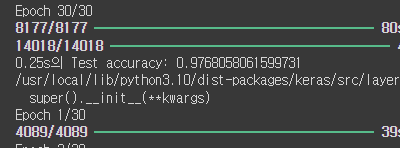

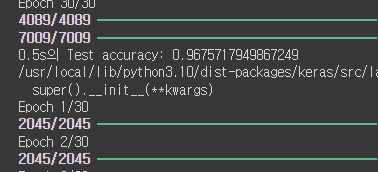